<a href="https://colab.research.google.com/github/elbuendiego/coding_challenge/blob/main/train_validate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training and validation

Import required libraries

In [4]:
import numpy as np
import pandas as pd
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import matplotlib.pyplot as plt

First import dataset of features and predictand

In [6]:
df = pd.read_csv(os.path.join("Data","train_test_dataset.csv"), index_col=0)
df.head()

,flow0,dflow,temp0,temp_1,pr0,pr_1,pr_Autumn,temp_Winter,temp_Spring,flow7
1958-01-12,-6.343972,-0.786185,-13.534921,-11.968254,2.162414,-1.820125,-999.0,-4.309683,-999.0,-1.177723
1958-01-19,-6.079429,0.264543,-5.780952,-13.534921,-0.609014,2.162414,-999.0,-5.148341,-999.0,-0.918714
1958-01-26,-6.630067,-0.550638,-12.282540,-5.780952,-0.724887,-0.609014,-999.0,-5.201058,-999.0,-0.856507
1958-02-02,-6.339438,0.290629,-2.928571,-12.282540,-2.112189,-0.724887,-999.0,-5.745788,-999.0,-1.025176
1958-02-09,-6.491128,-0.151690,-13.398413,-2.928571,-0.943935,-2.112189,-999.0,-5.544558,-999.0,-0.563749


Now to split the data

In [7]:
X = df
y = X.pop("flow7")
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2)

print(f"There are {len(X_train)//53} years in training set.")
print(f"There are {len(X_test)//53} years in test set.")

There are 45 years in training set.
There are 11 years in test set.


To train the model, a random search will be performed over a wide range of relevant parameters

In [168]:
# Determine parameters over which to perform the search
random_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(start = 10, stop = 170, num = 8)],
    'max_features': [4, 5, 6, 7],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [4, 6, 8, 10, 12, 14],
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
}

# Initiate RF regressor instance
rf = RandomForestRegressor()

# Randomly search over random_grid parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 50, cv = 5, verbose=2, random_state=42)

# Fit model through random search
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=130, max_features=4, min_samples_leaf=3, min_samples_split=6, n_estimators=100; total time=   0.7s

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 30, 60, 90, 110, 130,
                                                      150, 170],
                                        'max_features': [4, 5, 6, 7],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [4, 6, 8, 10, 12,
                                                              14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

Print the best parameters

In [169]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 1788}

Get an idea of the skill of the best model from the random search (prints coefficient of determination).

In [182]:
best_random = rf_random.best_estimator_
best_random.score(X_test,y_test)

0.22475436141700178

Refine the search with an iteration over a specified grid of parameters

In [179]:
param_grid = {
    'max_depth': [85, 90, 95],
    'max_features': [3, 4],
    'min_samples_leaf': [7, 8, 9],
    'min_samples_split': [10, 11],
    'n_estimators': [1800],
    'bootstrap': [True]
}
# Create a new instance
rf1 = RandomForestRegressor()
# Instantiate the grid search model and fit
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=1800; total time=   7.7s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=1800; total time=   7.7s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=1800; total time=   7.6s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=1800; total time=   7.7s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=10, n_estimators=1800; total time=   7.8s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=11, n_estimators=1800; total time=   7.8s
[CV] END bootstrap=True, max_depth=85, max_features=3, min_samples_leaf=7, min_samples_split=11, n_estimators=1800; total time= 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [85, 90, 95],
                         'max_features': [3, 4], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [10, 11],
                         'n_estimators': [1800]},
             verbose=2)

Get best params

In [180]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 1800}

Get an idea of its skill

In [181]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test,y_test)

0.2205956265836475

The skill above is slightly lower than that of the random search, so the model parameter tuning may not yeld better results. It might be better to spend time on feature engineering.

Below we compare to the skill of a multiple linear regression model

In [152]:
from sklearn.linear_model import LinearRegression

In [163]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

0.17725624772261717

The coefficient of determination of the linear model is lower than that of the random forest model. However, the values are relatively low, so it might be useful to perform a visual inspection of the data on a graph (to see if the predictions follow the observed anomalies).
Below, first we retrain an optimar RF model on the whole training dataset (this was not set explicitly in the cv options). Then the feature importances are plotted, followed by a graph of predictions and observations

In [8]:
optimal_params = {'bootstrap': True,
                  'max_depth': 90,
                  'max_features': 4,
                  'min_samples_leaf': 7,
                  'min_samples_split': 10,
                  'n_estimators': 1788}

rf = RandomForestRegressor(**optimal_params).fit(X_train, y_train)

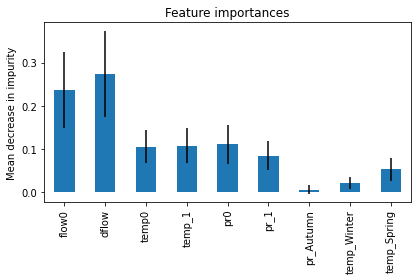

In [70]:
feature_importance = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(feature_importance, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Not so surprising, the flow at the previous time step and its time difference are the two most important features. The seasonal features are not as important, and perhaps further feature engineering might be needed.

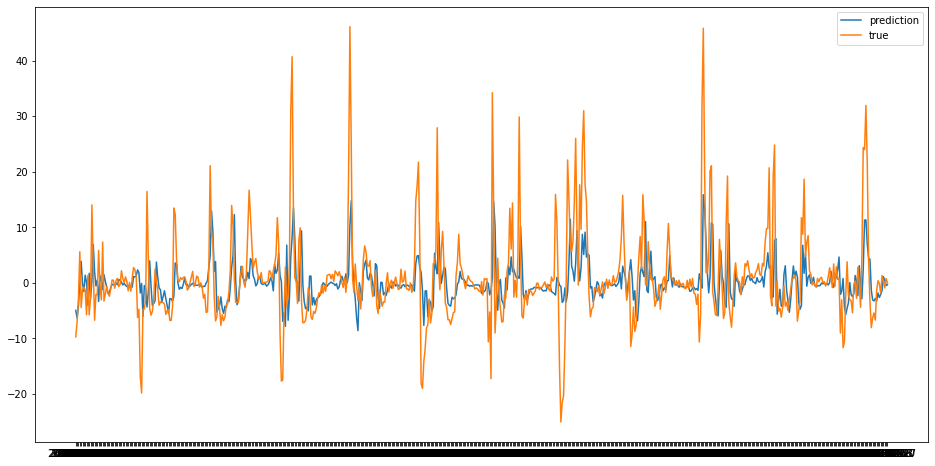

In [9]:
predictions = rf.predict(X_test)

plt.figure(figsize=(16, 8))

plt.plot(y_test.index, predictions, label = "prediction")
plt.plot(y_test.index, y_test, label = "true")
plt.legend()
plt.show()

The predictions follow the data, but extremes are poorly represented. Perhaps it might be useful to create separate models, one for the high variability period (Spring-Summer) and another one for the low variability period.

Now we check the model's performance against persistence

In [16]:
n_row = len(y)
r2_score(y[1:n_row],y[0:n_row-1])

0.170843191989147

Above we can see that the persistence score is lower than our RF score.

Finally, it would be useful to see model performance of anomaly amplitudes exceeding certain percentiles

In [65]:
y_df = y_test.to_frame()[0:-1]
y_df["predictions"] = predictions
y_df.columns = ["observed", "predictions"]

y_df_extreme = y_df.loc[abs(y_df["observed"]) > 10]
y_df_moderate = y_df.loc[abs(y_df["observed"]) <= 10]

mae_ext = mean_absolute_error(y_df_extreme["observed"], y_df_extreme["predictions"])
mae_mod = mean_absolute_error(y_df_moderate["observed"], y_df_moderate["predictions"])
print(f"The MAE of predictions for extreme conditions is {mae_ext}")
print(f"The MAE of predictions for moderate conditions is {mae_mod}")

The MAE of predictions for extreme conditions is 15.90697049503257
The MAE of predictions for moderate conditions is 2.5671296572509337


# Conclusion from training/validation exercise


*   From the training/validation exercise, it is clear that the RF model's performance is severely limited by its inability to capture extreme flow values, as revealed by the graph  and the MAE values shown above. It is possible that model performance can improve by training separate models on distinct periods (although data is reduced). 
*   The RF model performs better than both persistence and multiple linear regression. This, together with the visual inspection of the correspondence between predicted and observed values on the train dataset, gives some confidence that the model is effective at capturing relevant nonlinear processes.
*   Further feature engineering might improve the model. More flow entries might help, as well as nonlinear meteorological features.

